In [2]:
%load_ext autoreload
%autoreload 2
import random
from subprocess import call

# tell jupyter notebook to show plots inline (with output)
%matplotlib inline
import pandas as pd
import numpy as np
from scipy.stats.distributions import norm
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# tell whiny modules to shut up about it 
warnings.simplefilter('ignore', np.RankWarning)
warnings.filterwarnings("ignore", module="matplotlib")
warnings.filterwarnings("ignore", module="statsmodels")

import netgen as ng

In [18]:
ng.setDirectory('ThSTR')

In [19]:
ng.configureSweep(popscale=0.5, BaseStim = 2.0, WrongStim = [3.24], RightStim = [3.26], Dynamic=[30], direct=1.1, indirect=1.1)

1

In [9]:
ng.compileAndRunSweep(4,0,1)

In [10]:
results = ng.readAllTrialResults(4,0,1)

In [12]:
decisions = []
for sn in range(1):
    decisions.append([])
    for result in results[sn]:
        decisions[sn].append(ng.findOutputs(result)['decision made'])

In [13]:
rightreact = []
wrongreact = []
allreact = []
accuracy = []
completed = []
for sn in range(1):
    rightreact.append([])
    wrongreact.append([])
    allreact.append([])
    for decision in decisions[sn]:
        if decision['pathvals'] is None:
            continue 
        elif decision['pathvals'] == [0]:
            rightreact[sn].append(decision['delay'])
            allreact[sn].append(decision['delay'])
        else:
            wrongreact[sn].append(decision['delay'])
            allreact[sn].append(decision['delay'])
    completed.append((len(rightreact[sn])+len(wrongreact[sn]))/len(decisions[sn]))
    if len(rightreact[sn])+len(wrongreact[sn]) > 0:
        accuracy.append(len(rightreact[sn])/(len(rightreact[sn])+len(wrongreact[sn])))
    else:
        accuracy.append(-1)

In [15]:
for sn in range(0):
    print((sum(rightreact[sn])+sum(wrongreact[sn])) / (len(rightreact[sn]) + len(wrongreact[sn])))

In [16]:
print(accuracy,completed)

[1.0] [1.0]


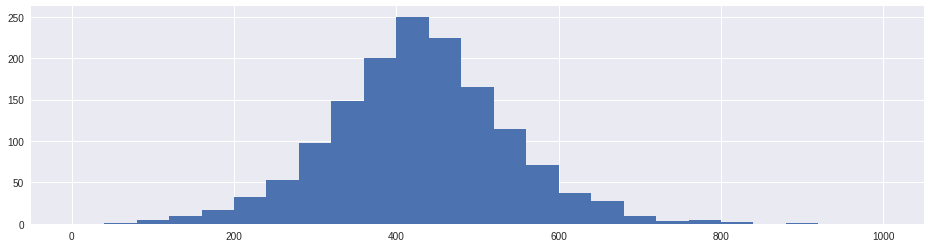

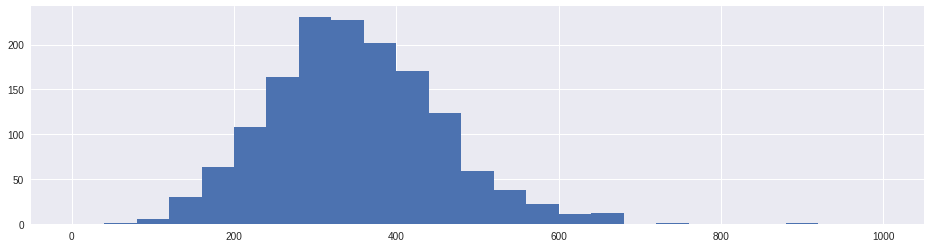

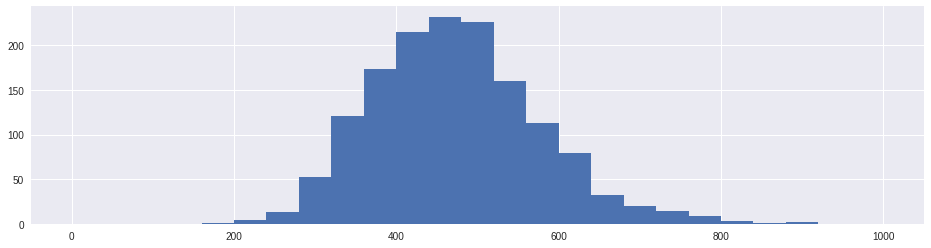

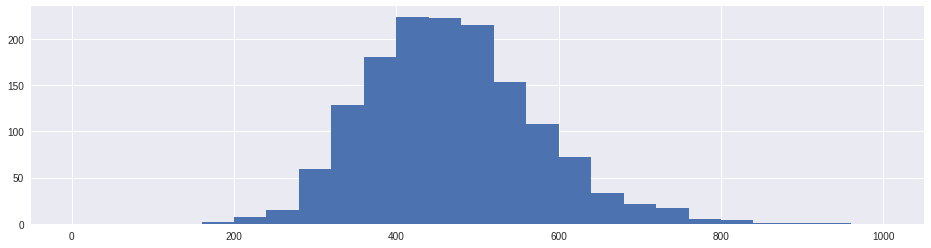

In [38]:
for sn in range(4):
    #print(results[sn][0]['direct'], results[sn][0]['indirect'])
    f, (ax1) = plt.subplots(1, 1, figsize=(16,4), sharex=True)
    pd.Series(allreact[sn]).hist(bins=25, range=[0,1000], ax=ax1)
    # plt.savefig('/home/mclapp/RTs_direct'+str(results[sn][0]['direct']*100)+'%_i

In [39]:
summary = open('BehavioralDataCxTh.txt', 'w')
summary.write("trial,stim,response,choice,acc,rt,direct,indirect\n")
trialnum = 0
for sn in range(4):
    for result in results[sn]:
        if (result['outputs']['decision made']['pathvals'] is not None):
            summary.write(str(trialnum) + ',')
            summary.write('left' + ',')
            summary.write('1' + ',')
            if result['outputs']['decision made']['pathvals'][0] == 0:
                summary.write('left,1,')
            else:
                summary.write('right,0,')
            summary.write(str(result['outputs']['decision made']['delay']/1000) + ',')
            if sn == 0:
                summary.write('lowL_highR,medL_medR')
            if sn == 1:
                summary.write('highL_lowR,medL_medR')
            if sn == 2:
                summary.write('medL_medR,lowL_highR')
            if sn == 3:
                summary.write('medL_medR,highL_lowR')
            summary.write("\n")
            trialnum += 1
    summary.flush()
summary.close()

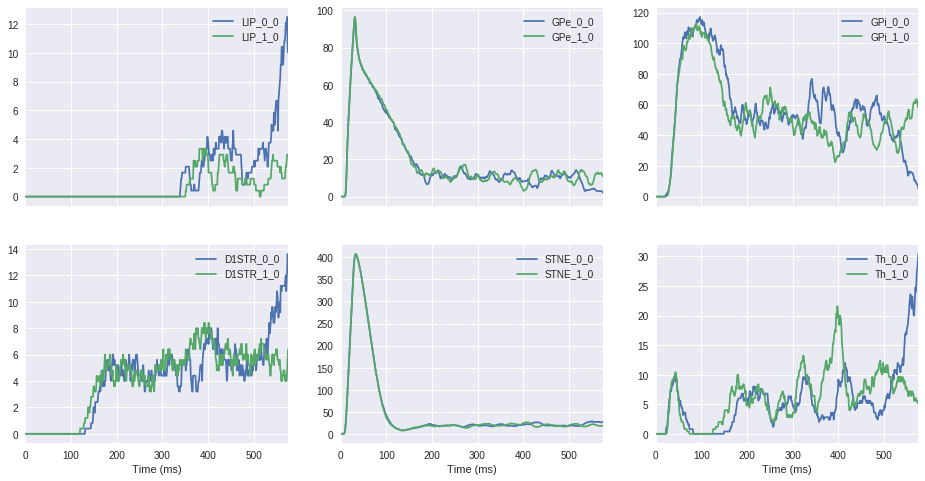

In [17]:
f, (ax1, ax2) = plt.subplots(2, 3, figsize=(16,8), sharex=True)
result = results[0][0]
for i in range(0,result['dims']['choices']):
    result['popfreqs'].plot(x='Time (ms)', y='LIP_'+str(i)+'_0', ax=ax1[0])
    result['popfreqs'].plot(x='Time (ms)', y='GPe_'+str(i)+'_0', ax=ax1[1])
    result['popfreqs'].plot(x='Time (ms)', y='GPi_'+str(i)+'_0', ax=ax1[2])
    result['popfreqs'].plot(x='Time (ms)', y='D1STR_'+str(i)+'_0', ax=ax2[0])
    result['popfreqs'].plot(x='Time (ms)', y='STNE_'+str(i)+'_0', ax=ax2[1])
    result['popfreqs'].plot(x='Time (ms)', y='Th_'+str(i)+'_0', ax=ax2[2])

for ax, axx in zip(ax1, ax2):
    ax.set_xlim(0, ax.get_xlim()[-1])
    axx.set_xlim(0, ax.get_xlim()[-1])